In [1]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
print(keras.__version__)
from keras.datasets import mnist
from keras import models,layers

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.2.2


# Neural Network Architecture

Classification in 10 classes (supervised)

Input layer : INPUT --> shape(28,28) 784 pixels -- OUTPUT --> 512

Flattening (needed beacuse of the shape of the output layers that is 1 - matrix multiplication result)

Output Layer: 10 classes

In [17]:
#Dense or fully connected is the most simple architecture for neural network
#activation function = relu --> because it's a good start
#softmax makes sure that the sum of probability of all the 10 classes is 1 and each probability is between 0 and 1
#Every layer has an activation function

model = models.Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(784,)))
#model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

model.summary()

#14848 is the number of the weights (28*512) + the number of bias (512)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Reshaping inside the Neural Network Architecture definition

model = models.Sequential()

### model.add(layers.Reshape((28*28,),input_shape=(28,28)))

model.add(layers.Dense(512, activation='relu',input_shape=(28*28,))) #512 is the output of layer
model.add(layers.Dense(10,activation='softmax'))

# Compiling the Neural Network

The optimizer "rmsprop" changes the learning
lost function tell you how much error you have (distances between probability distribution)

FOR CLASSIFICATION WE NEED TO USE SOFTMAX AND CATEGORICAL CROSSENTROPY (more than two classes);
If we are considering two classes, we could use binary_crossentropy
#Accuracy --> how much you predictions are correct
#Loss --> how much the error is

In [3]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [4]:
#Loading the train and test dataset
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print('train shape is:',train_images.shape)
print('train label are',train_labels.shape)
print('test shape is:',test_images.shape)
print('test label are',test_labels.shape)

train shape is: (60000, 28, 28)
train label are (60000,)
test shape is: (10000, 28, 28)
test label are (10000,)


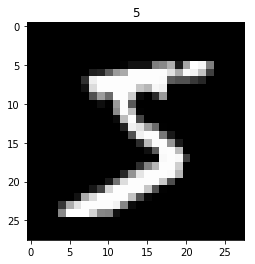

In [5]:
i=0
plt.imshow(train_images[i],cmap='gray')
plt.title(str(train_labels[i]))  
plt.show()

In [6]:
print(train_images.shape)
print(type(train_images))
train_images[0].shape

(60000, 28, 28)
<class 'numpy.ndarray'>


(28, 28)

## Feature Scaling --> numbers from 0 to 255 and Reshaping

In [7]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255.0  

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255.0

In [8]:
#Now we need to create the output layer of ten classes. (10000,) --> (10000,10)
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)  #like one hot encoding
test_labels = to_categorical(test_labels)

# Evaluating the model before the training (optimization)

In [9]:
#weights are initialized as small and random numbers
#The model evaluation gives us the loss function and also the accuracy of the model
model.evaluate(train_images,train_labels)

60000/60000 [==============================] - 3s 43us/step


[2.4205099868774416, 0.08238333333333334]

In [10]:
#The prediction gives us an array of ten elements with the probability for each class
#Having used the softmax function, the sum of all probabilities will be 1
model.predict(train_images[0:1])   #assumes an array as input so at list 2 dimensional

array([[0.05868605, 0.15625581, 0.13358255, 0.06866248, 0.05212016,
        0.08336701, 0.09200297, 0.15433073, 0.13566943, 0.06532285]],
      dtype=float32)

In [11]:
import numpy as np
print(model.predict(train_images[0:1]))
print(np.max(model.predict(train_images[0:1])))
print(np.argmax(model.predict(train_images[0:1])))
print(train_labels[0])

[[0.05868605 0.15625581 0.13358255 0.06866248 0.05212016 0.08336701
  0.09200297 0.15433073 0.13566943 0.06532285]]
0.15625581
1
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Fitting the model

In [12]:
history = model.fit(
    train_images,train_labels,
    epochs=5,
    batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2558 - acc: 0.9265
Epoch 2/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.1033 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.0689 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.0501 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0377 - acc: 0.9886


In [13]:
#history.history print out the loss and accuracy for each epoch
print(history.history)

{'loss': [0.25583986087640126, 0.10327355385224024, 0.06885524533390999, 0.05010161094168822, 0.037708531599243485], 'acc': [0.9265333333015442, 0.9698166666348775, 0.9795833333333334, 0.9850166666348775, 0.9886333333333334]}


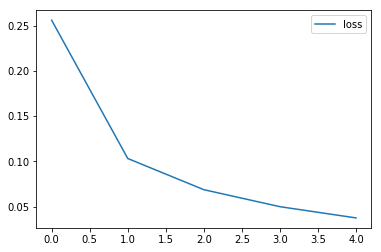

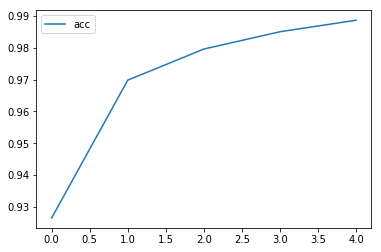

In [14]:
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'],label='acc')
plt.legend()
plt.show()
plt.close()

In [16]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(test_loss,test_acc)

10000/10000 [==============================] - 0s 47us/step
0.06075725774471648 0.9816


In [ ]:
#The model is working very well and the accuracy of the test set is the same as the training